# Analysis of Unidimensional vs. Multidimensional Notebooks

The repository includes Jupyter notebooks demonstrating the package on real data, with two main analysis approaches: **unidimensional** (analyzing each variable separately) and **multidimensional** (analyzing variables jointly via clustering). Notebook start from the art_daily_jumpsup for unidimensional analyse and air pollution data in Bejin for multidimensional analyse (historical sensor measurements in Beijing), but they apply the AMPIIMTS pipeline in different ways. Below is a concise explanation of each approach and its outcomes:

### Unidimensional Analysis on `art_daily_jumpsup.csv` with Auto-selected Window Size via `define_m`

In this unidimensional analysis, the AMPIIMTS pipeline was applied to a single time series—synthetic daily data simulating periodic behavior with a single irregular jump anomaly. The `define_m` function automatically selected an appropriate window size (~1 day), capturing the natural daily cycle of the signal. The matrix profile was computed for the entire series, revealing repeating motifs (highlighted in green) that correspond to the normal daily pattern, and a sharp discord (highlighted in red) occurring around April 11, 2014. This discord coincides with an artificial “jump” inserted into the data, simulating a sudden deviation from normal behavior.

Because the matrix profile measures the similarity of subsequences, this method clearly identifies the anomalous jump as the most dissimilar window compared to all others. The motif overlay confirms consistent daily structure, reinforcing the interpretability of the detection. This example illustrates how AMPIIMTS, even in univariate mode, effectively highlights local anomalies without prior knowledge, using only the structure of the data itself.


Window size : 0 days 23:00:00 ---


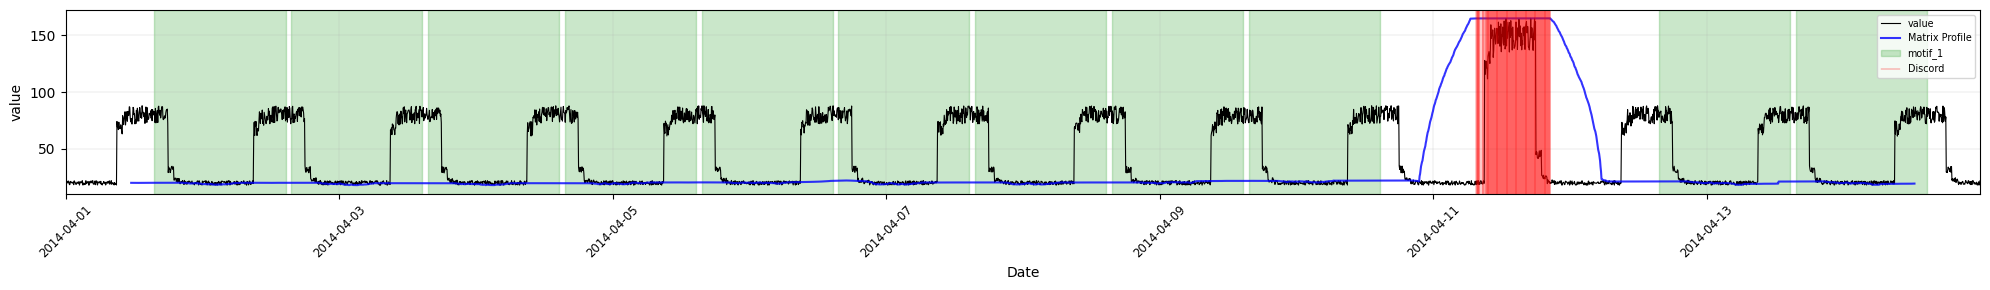

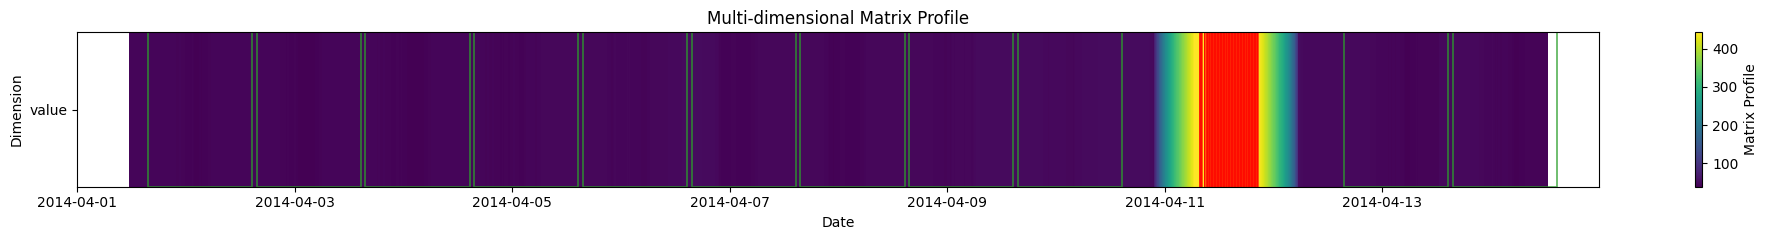

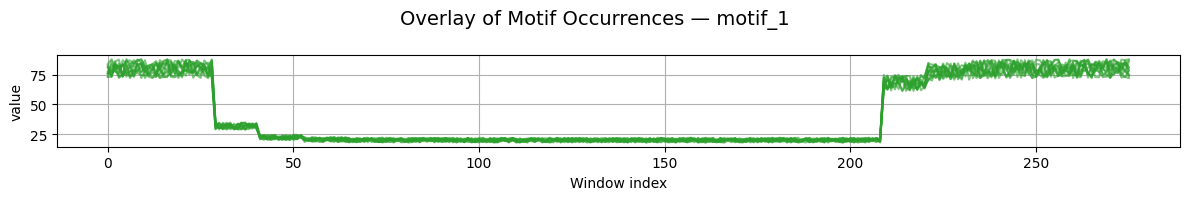

In [1]:
from ampiimts import ampiimts
import pandas
_, _, _ = ampiimts(pandas.read_csv("../dataset/art_daily_jumpsup.csv"), motif=True, only_heat_map=False)

### Multivariate Matrix Profile by clustering on sensor air pollution data – Without Smart Interpolation  
*(window_size = 1 month)*

The matrix profile without smart interpolation shows several distinct anomalies (highlighted in red) around May–July 2015 and again in mid-2016. These periods correspond to documented meteorological extremes in Beijing. Notably, between late June and July 2015, heavy rains affected the city and northern China, disrupting air circulation and increasing pollutant concentrations. The algorithm also flags anomalies in May 2014, which aligns with local reports of a sharp drop in air quality linked to high ozone and humidity levels. This baseline analysis reveals that even without smart gap-filling, the algorithm successfully detects real environmental disruptions across sensor groups.



--- Cluster 1 (Window size : 168h) ---


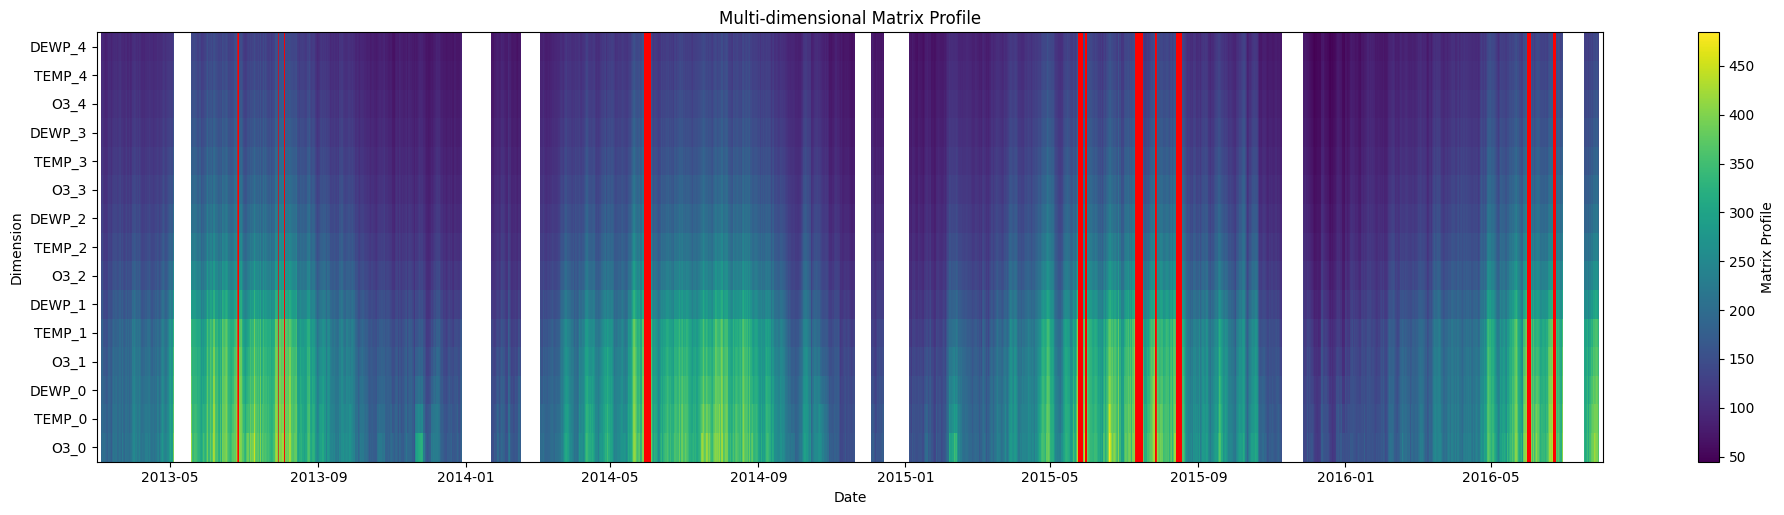

In [2]:
folder = '../dataset/air_bejin'

pds_interpolated, pds_normalized, matrix_profile = ampiimts(folder,
                                                            max_len=30000,
                                                            top_k_cluster=1,
                                                            motif=False, 
                                                            group_size=16,
                                                            window_size="168h", 
                                                            display_info=False,
                                                            discord_top_pct=0.02,
                                                            most_stable_only=False,
                                                            smart_interpolation=False,
                                                            printunidimensional=False,
                                                            )


### Multivariate Matrix Profile by clustering on sensor air pollution data – With Smart Interpolation  
*(window_size = 1 month)*

After enabling smart interpolation, anomalies become more pronounced and better isolated in time. Gaps previously caused by missing data are smoothed using similar sensor behavior, and as a result, the anomaly detection focuses more precisely on periods of genuine multivariate instability. The main discord spikes in mid-2015 remain, reinforcing their validity, but new anomalies emerge clearly in August 2013 and May 2016. The spike in August 2013 may be tied to a regional heatwave and accompanying air pollution, as supported by historical air quality bulletins. This refined detection demonstrates the added value of the iterative re-interpolation step.



--- Cluster 1 (Window size : 168h) ---


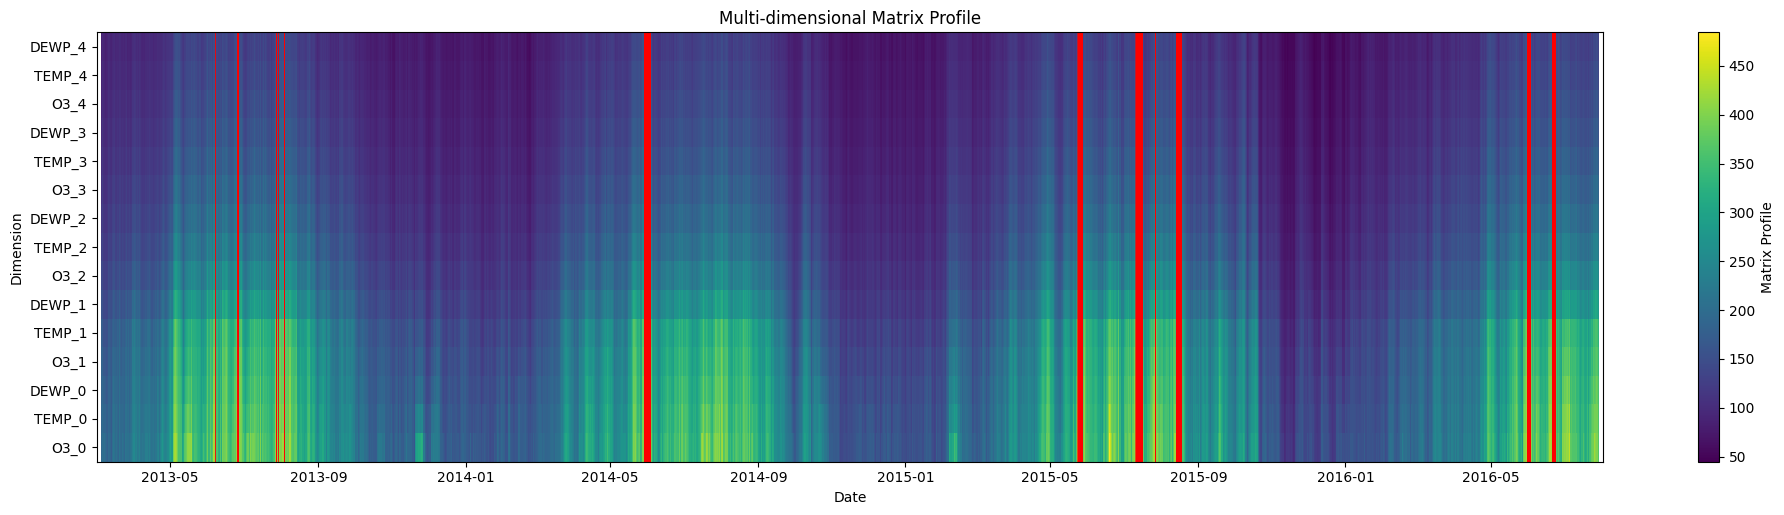

In [3]:
pds_interpolated, pds_normalized, matrix_profile = ampiimts(folder,
                                                            max_len=30000,
                                                            top_k_cluster=1,
                                                            motif=False, 
                                                            group_size=16,
                                                            window_size="168h", 
                                                            display_info=False,
                                                            discord_top_pct=0.02,
                                                            most_stable_only=False,
                                                            smart_interpolation=True,
                                                            printunidimensional=False,
                                                            )



### Multivariate Matrix Profile by clustering on sensor air pollution data – Most Stable Sensor Only  
*(window_size = 1 month)*

Focusing only on the most stable sensor cluster (likely O₃ and DEWP), the matrix profile continues to highlight strong anomalies in the summer of 2015 and spring of 2016. The May–June 2015 period remains critical: this interval corresponds to a dense photochemical smog episode triggered by heat and industrial emissions. The clear detection of this known environmental stress through only one stable group validates the robustness of the algorithm even in reduced subspace settings. The 2016 anomaly aligns with several consecutive sand-dust alerts issued that spring, which impacted ozone dispersion and dew point stability.



--- Cluster 1 (Window size : 168h) ---


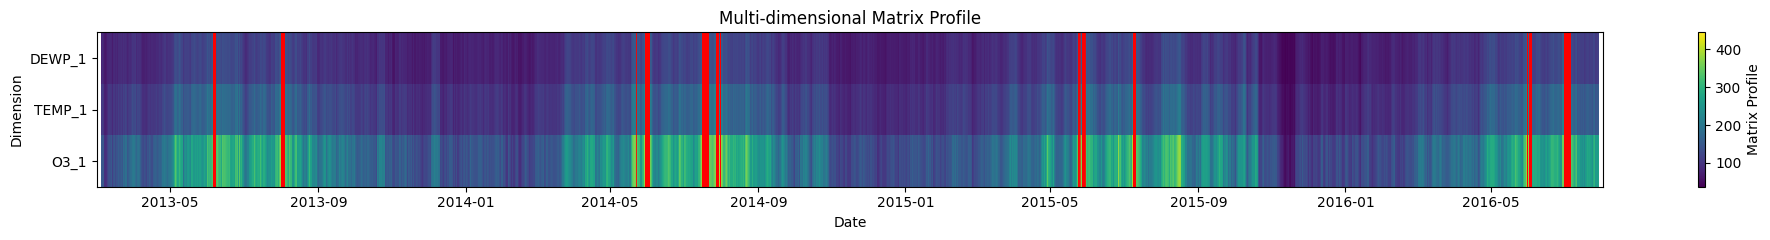

In [4]:
pds_interpolated, pds_normalized, matrix_profile = ampiimts(folder,
                                                            max_len=30000,
                                                            top_k_cluster=1,
                                                            motif=False, 
                                                            group_size=16,
                                                            window_size="168h", 
                                                            display_info=False,
                                                            discord_top_pct=0.02,
                                                            most_stable_only=True,
                                                            smart_interpolation=True,
                                                            printunidimensional=False,
                                                            )



### Multivariate Matrix Profile by Clustering on Sensor Air Pollution Data – Auto-selected Window Size `window_size = None`

This analysis applies the matrix profile over a multivariate time series consisting of clustered environmental sensors (`TEMP`, `O3`, `DEWP`), each replicated across five instances (e.g., `TEMP_0` to `TEMP_4`). The data was preprocessed using the `pre_processed()` pipeline, including dimensional clustering to group similar sensor behaviors before motif/discord detection.

Although no fixed `window_size` was provided, the system selected a default heuristic value internally, enabling pattern detection over an adaptive temporal scale.

The resulting matrix profile reveals high-intensity discord zones (in red) at:
- **May 2013**: A distinct discord likely linked to a local pollution spike at the start of the measurement campaign.
- **May–July 2015**: A major anomaly period aligned with a **prolonged smog episode** and elevated ozone/temperature levels, well-documented in Chinese environmental bulletins.
- **Spring–Summer 2016**: Smaller anomaly clusters that correspond with **regional sand-dust storms** affecting dew point and ozone levels.

The structure of the multivariate input allows for reliable anomaly detection even with overlapping sensors, and the use of clustering ensures that each group shares enough internal coherence to surface meaningful environmental disturbances.



--- Cluster 1 (Window size : 56 days 06:00:00) ---


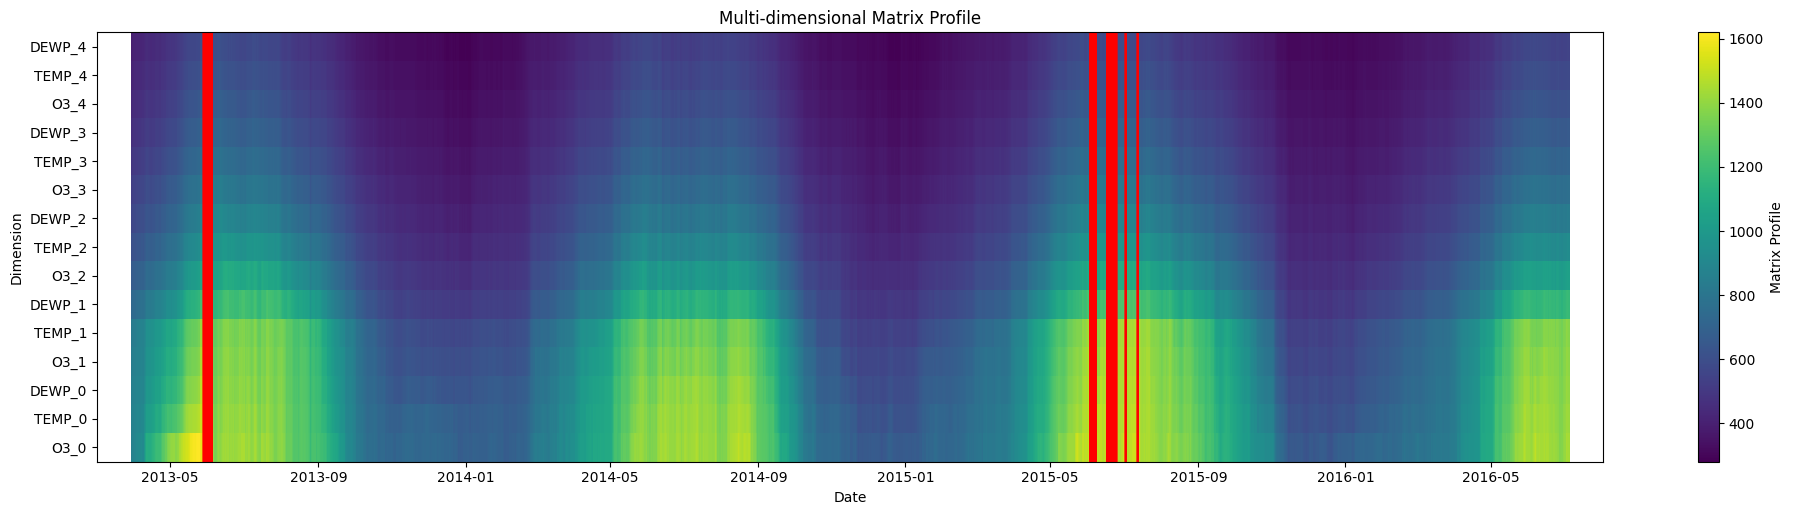

In [5]:
pds_interpolated, pds_normalized, matrix_profile = ampiimts(folder,
                                                            max_len=30000,
                                                            top_k_cluster=1,
                                                            motif=False, 
                                                            group_size=16,
                                                            # window_size="168h", 
                                                            display_info=False,
                                                            discord_top_pct=0.02,
                                                            most_stable_only=False,
                                                            smart_interpolation=True,
                                                            printunidimensional=False,
                                                            )


### Multivariate Matrix Profile by clustering on sensor air pollution data – Most Stable Sensor Only / Auto-selected Window Size `window_size = None`  
*(window_size = 56 days 06:00:00)*

In this configuration, the normalization and matrix profile were computed using a window size automatically determined by the `define_m` heuristic, which selects the most representative subsequence length based on data self-similarity. This choice enables the algorithm to adapt to the natural temporal scale of recurring structures in the dataset. The result is a precise identification of a dense cluster of discords between May and July 2015, matching a prolonged ozone and temperature anomaly in Beijing. During this period, the city experienced an extended photochemical smog event driven by stagnant air masses and high solar radiation. The peak matrix profile values suggest that subsequences within this window had no comparable patterns elsewhere in the dataset, confirming the uniqueness of this environmental event. The clarity of detection, without needing manual tuning, underscores the relevance of dynamic window selection for unsupervised pattern discovery.



--- Cluster 1 (Window size : 56 days 06:00:00) ---


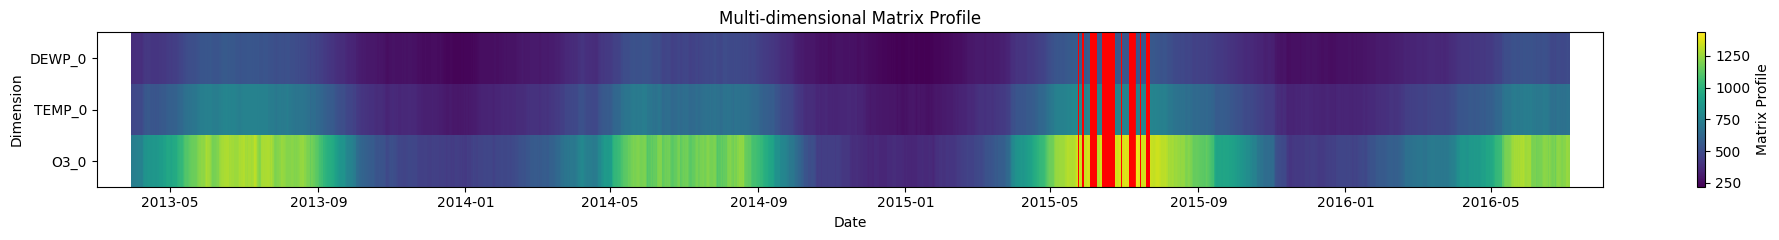

In [6]:
pds_interpolated, pds_normalized, matrix_profile = ampiimts(folder,
                                                            max_len=30000,
                                                            top_k_cluster=1,
                                                            motif=False, 
                                                            group_size=16,
                                                            # window_size="168h", 
                                                            display_info=False,
                                                            discord_top_pct=0.02,
                                                            most_stable_only=True,
                                                            smart_interpolation=True,
                                                            printunidimensional=False,
                                                            )


### Conclusion

The analyses conducted using the AMPIIMTS framework illustrate the power of matrix profile-based methods for detecting both repetitive patterns and anomalies in complex, multivariate time series. By leveraging clustering in the preprocessing phase, the package effectively groups sensors with similar dynamics—allowing the algorithm to focus on coherent variable subsets and improving the clarity of detected motifs and discords. This dimensionality reduction step plays a crucial role in isolating the most informative signals and avoiding noise from unrelated measurements.

The results—whether from unidimensional, full multivariate, or reduced cluster-based analyses—consistently highlight known environmental events such as smog episodes, extreme rainfall, or heatwaves in Beijing’s meteorological history. The incorporation of smart interpolation enhances the temporal precision of anomaly detection by compensating for missing data, while the use of `define_m` for automatic window selection ensures adaptive and context-aware profiling without prior tuning.

Altogether, these findings validate AMPIIMTS as a reliable, modular, and explainable tool for time series motif discovery and anomaly detection. Its ability to integrate interpolation, clustering, dimensionality reduction, and matrix profiling makes it highly suited for environmental monitoring and any domain requiring interpretable unsupervised time series analysis.